In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('AB_NYC_2019.csv')

# Select relevant features for economic clustering
features = ['price', 'minimum_nights', 'number_of_reviews', 'availability_365']

# Handle missing values
df[features] = df[features].fillna(0)

# Filter out extreme outliers (removing 1%)
df = df[df['price'] <= df['price'].quantile(0.99)]

In [11]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

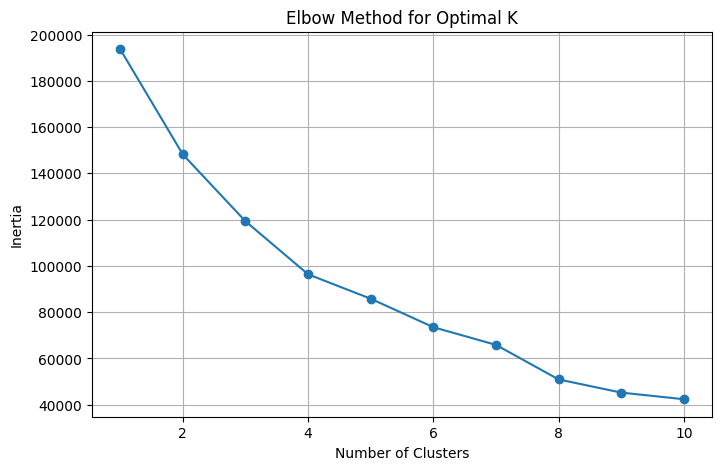

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [14]:
# The elbow apears to be aroud 4-6 clusters so we will go with 4 clusters to get a more concise model
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

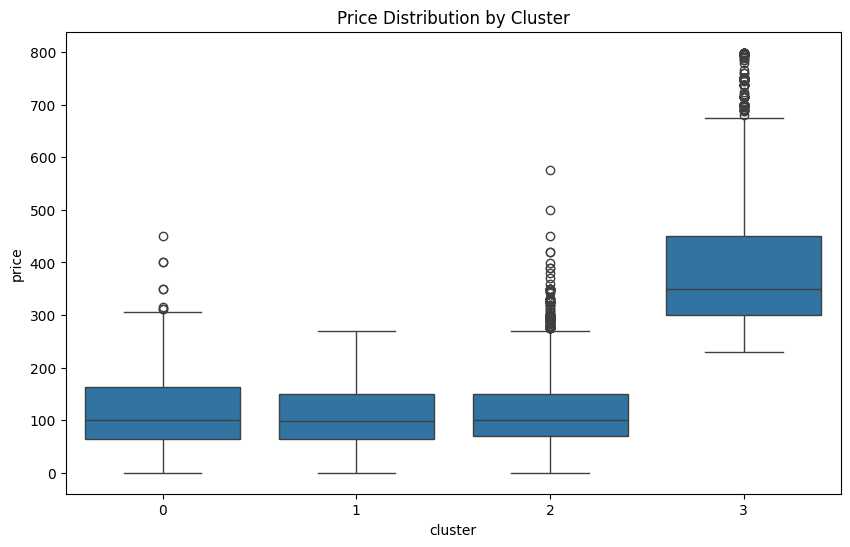

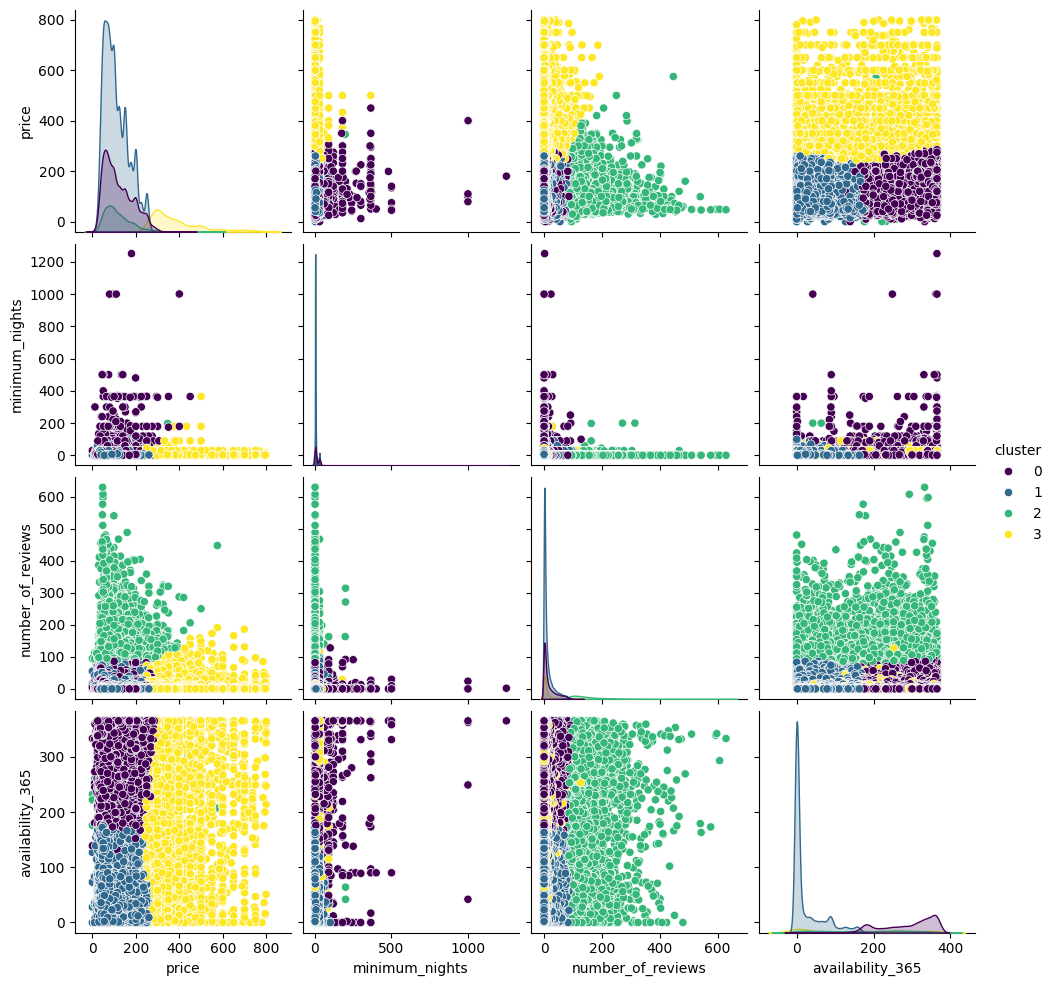

In [15]:
import seaborn as sns

# Cluster distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='price', data=df)
plt.title("Price Distribution by Cluster")
plt.show()

# Pair plot (Collection of scatter graphs)
sns.pairplot(df, vars=features, hue='cluster', palette='viridis')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Define features and target
X = df[['minimum_nights', 'number_of_reviews', 'availability_365']]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error: 72.90
R^2 Score: 0.02


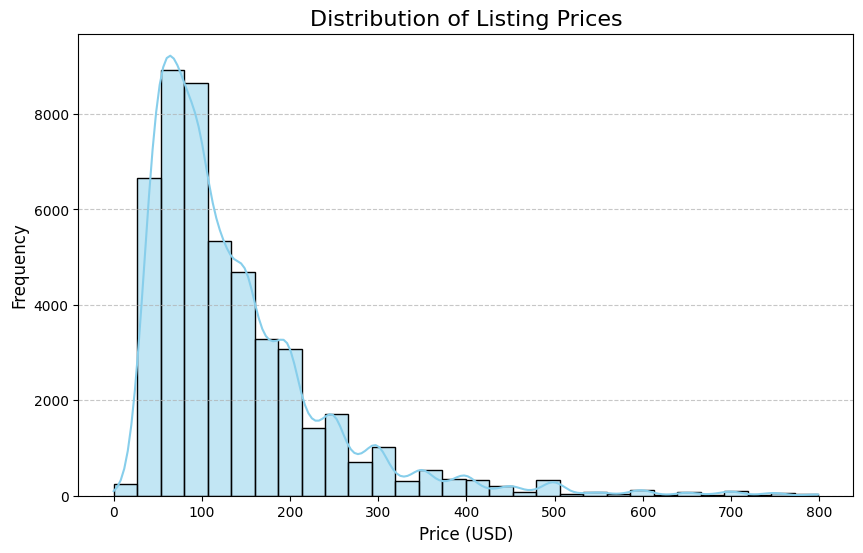

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

price_data = df['price']

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(price_data, bins=30, kde=True, color='skyblue')

# Customize the plot
plt.title("Distribution of Listing Prices", fontsize=16)
plt.xlabel("Price (USD)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()